## Interpolacja 


#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 


Sinus function


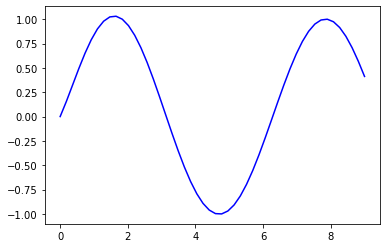

Sqrt function


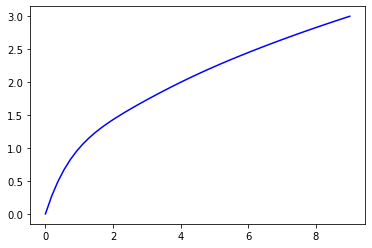

Polynomial function


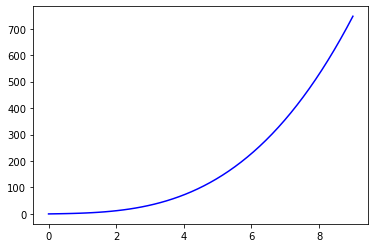

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

errorNewton=[];

def newtonCoefficient(x,y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(x[k:m] - x[k-1])
    return a

def coefficient(xs, ys):
    length = len(ys)
    pyramid = np.zeros([length, length]) 
    pyramid[::,0] = ys 
    for j in range(1,length):
        for i in range(length-j):
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (xs[i+j] - xs[i])
    return pyramid[0]


def newtonPolynomial(xs, ys):
    coeff_vector = coefficient(xs, ys)
    final_pol = np.polynomial.Polynomial([0.])
    n = coeff_vector.shape[0] 
    for i in range(n):
        p = np.polynomial.Polynomial([1.]) 
        for j in range(i):
            p_temp = np.polynomial.Polynomial([-xs[j], 1.]) 
            p = np.polymul(p, p_temp) 
        p *= coeff_vector[i]
        final_pol = np.polyadd(final_pol, p) 

    return np.flip(final_pol[0].coef, axis=0)

#Parametrs
xs_sin = np.array([0,1,3,5,6,7,8,9,11])
ys_sin = []
for x in xs_sin:
    ys_sin.append(np.sin(x))
xs_sqrt = np.array([0,1,3,5,6,7,8,9,11])
ys_sqrt = []
for x in xs_sqrt:
    ys_sqrt.append(np.sqrt(x)) 
    
xs_add_pow = np.array([0,1,3,5,6,7,8,9,11])
ys_add_pow = []
for x in xs_add_pow:
    y=np.power(x,3)+(2*x) 
    ys_add_pow.append(y) 

def show(xs, ys):
    p = newtonPolynomial(xs, ys)
    x_axis = np.linspace(0, 9, num=50)
    y_axis = np.polyval(p,x_axis)
    plt.plot(x_axis, y_axis, "b-")
    plt.show()
    
#Wykresy
print("Sinus function")
show(xs_sin, ys_sin)
print("Sqrt function")
show(xs_sqrt, ys_sqrt)
print("Polynomial function")
show(xs_add_pow, ys_add_pow)



#### Zadanie 2: Interpolacj metodą Hermite'a
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji).

Sinus function


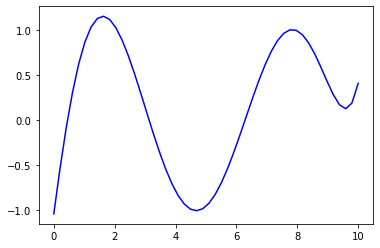

Sqrt function


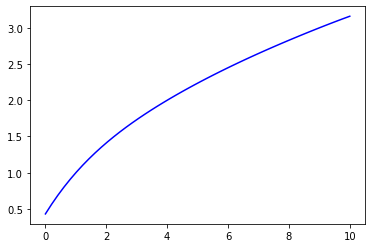

Polynomial function


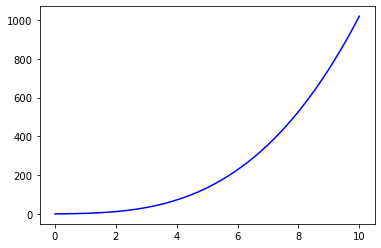

In [187]:
def calculate(f, val):
    X = sp.symbols('x')  
    return f.evalf(subs={'x':val})

def hermitePolynomial(x_array, y_array):
    n = len(x_array)
    derivatives = [0] * n
    for i in range(1, n):
        if x_array[i] == x_array[i-1]:
            derivatives[i] = derivatives[i-1] + 1
        else:
            derivatives[i] = 0
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            if derivatives[j] == 0:
                y_array[j] = \
                    (y_array[j] - y_array[int(j-1 - derivatives[j-1])]) / (x_array[j] - x_array[j - i])
            else:
                y_array[j] /= float(i)
                derivatives[j] -= 1
    for j in range(n - 1, -1, -1):
        for i in range(j, n - 1, 1):
            y_array[i] = y_array[i] - y_array[i+1] * x_array[j]
    polynomial = 0
    X = sp.symbols('x')  
    for i in range(n):
        polynomial += y_array[i]*pow(X, i)

    return polynomial

def show(xs, ys):
    p = hermitePolynomial(xs, ys)
    x_axis = np.linspace(0, 10, num=50)
    y_axis=[]
    for i in range(0,len(x_axis)):
        y_axis.append(calculate(p,x_axis[i]))
    plt.plot(x_axis, y_axis, "b-")
    plt.show()



    
#Wykresy
print("Sinus function")
show(xs_sin, ys_sin)
print("Sqrt function")
show(xs_sqrt, ys_sqrt)
print("Polynomial function")
show(xs_add_pow, ys_add_pow)

#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego 
***Efekt Rungego*** – pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się, jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

Takie zachowanie się wielomianu interpolującego jest zjawiskiem typowym dla interpolacji za pomocą wielomianów wysokich stopni przy stałych odległościach węzłów. Występuje ono również, jeśli interpolowana funkcja jest nieciągła albo odbiega znacząco od funkcji gładkiej.

Ponieważ zgodnie z twierdzeniem Weierstrassa istnieje ciąg interpolujących wielomianów coraz wyższych stopni, które przybliżają jednostajnie funkcje ciągłą, można uważać to za paradoks, iż efekt Rungego ma dokładnie odwrotny wynik. Jest to spowodowane nałożeniem warunku na równoodległość węzłów.

Aby uniknąć tego efektu, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji. Np. węzłami interpolacji n-punktowej wielomianowej powinny być miejsca zerowe wielomianu Czebyszewa n-tego stopnia.

Distance between points 0.1


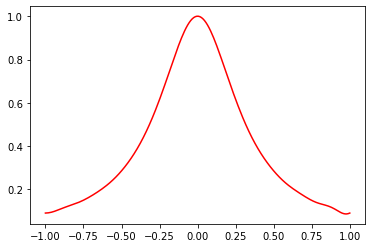

Distance between points 0.033


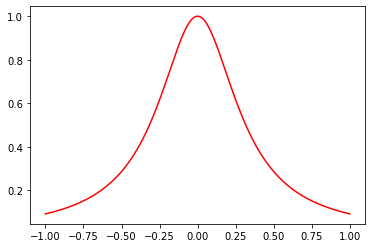

Distance between points 0.0111


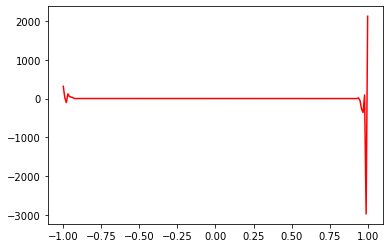

In [196]:
import numpy as np

def lagrange(points):
    def P(x):
        total = 0
        n = len(points)
        for i in range(n):
            xi, yi = points[i]
            
            def g(i, n):
                
                tot_mul = 1
                for j in range(n):
                    if i == j:
                        continue
                    xj, yj = points[j]
                    tot_mul *= (x - xj) / float(xi - xj)
                    
                return tot_mul 

            total += yi * g(i, n)
        return total
    return P 

def interpolujPow(węzły):
    points = []
    for x in węzły:
        y=(1/(1+(10*np.power(x,2))))
        points.append((x,y)) 
    return lagrange(points)

print("Distance between points 0.1")
points = np.arange(-2,2,0.1)
w1 = interpolujPow(points)

t = np.linspace(-1, 1, 200)
plt.plot(t, w1(t), 'r-')
plt.show()

print("Distance between points 0.033")
points = np.arange(-2,2,0.033)
w1 = interpolujPow(points)

t = np.linspace(-1, 1, 200)
plt.plot( t, w1(t), 'r-')
plt.show()


print("Distance between points 0.0111")
points = np.arange(-2,2,0.0111)
w1 = interpolujPow(points)

t = np.linspace(-1, 1, 200)
plt.plot(t, w1(t), 'r-')
plt.show()


#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 

Sinus function


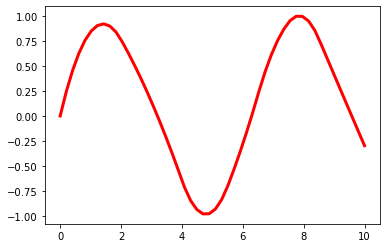

Sqrt function


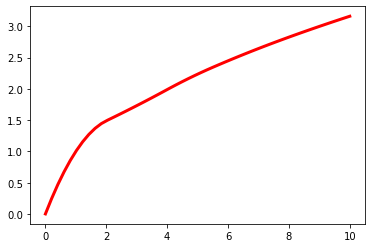

Polynomial function


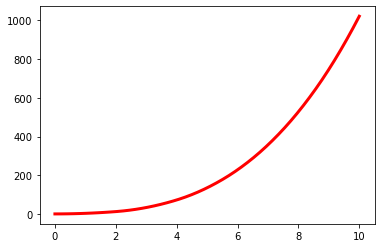

In [246]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))

def show(x_ax,y_ax):
    t, c, k = interpolate.splrep(x_ax, y_ax, s=0, k=2)
    fig,ax = plt.subplots()
    xx = np.linspace(0, 10, 50)
    ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3)
    plt.show()
    
#Wykresy
print("Sinus function")
show(xs_sin, ys_sin)
print("Sqrt function")
show(xs_sqrt, ys_sqrt)
print("Polynomial function")
show(xs_add_pow, ys_add_pow)